<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Bangladesh_Economic_Indicators_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u><center><font size=10 color='indigo'>BANGLADESH ECONOMIC INDICATORS ANALYSIS</font></center></u></h1>

# 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
print("All packages have been installed successfully!")

All packages have been installed successfully!


# 2. Importing the datasets

In [2]:
df = pd.read_csv('/content/BD_economic_indicators.csv')
df.head()

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,NaN,NaN,14.44%
1,1981,47.4,560,5.60%,14.50%,NaN,NaN,17.16%
2,1982,52.0,597,3.20%,12.90%,NaN,NaN,17.36%
3,1983,56.5,633,4.60%,9.50%,NaN,NaN,16.56%
4,1984,61.0,664,4.20%,10.40%,NaN,NaN,16.48%


In [3]:
df.tail()

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
35,2015,581.6,"3,638",6.80%,6.20%,4.42%,33.60%,28.89%
36,2016,629.9,"3,900",7.20%,5.70%,4.35%,33.30%,29.65%
37,2017,690.5,"4,231",7.60%,5.60%,4.37%,32.60%,30.51%
38,2018,753.4,"4,630",7.90%,5.60%,4.30%,34.00%,31.23%
39,2019,817.6,"5,028",8.10%,5.50%,4.29%,33.50%,31.60%


# 3. Data exploration

In [4]:
r,c = df.shape
print("The number of columns in the dataset = ",c)
print("The number of rows in the dataset    = ",r)

The number of columns in the dataset =  8
The number of rows in the dataset    =  40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              40 non-null     int64  
 1   GDP               40 non-null     float64
 2   GDP per capita    40 non-null     object 
 3   GDP growth        40 non-null     object 
 4   Inflation rate    40 non-null     object 
 5   Unemployed rate   29 non-null     object 
 6   Government debt   17 non-null     object 
 7   Total Investment  40 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.6+ KB


# 4. Data Cleaning and Processing

In [6]:
df = df.replace(np.nan,'%')

In [7]:
df.head(15)

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.10%,15.40%,%,%,14.44%
1,1981,47.4,560,5.60%,14.50%,%,%,17.16%
2,1982,52.0,597,3.20%,12.90%,%,%,17.36%
3,1983,56.5,633,4.60%,9.50%,%,%,16.56%
4,1984,61.0,664,4.20%,10.40%,%,%,16.48%
5,1985,65.3,693,3.70%,10.50%,%,%,15.83%
6,1986,69.3,715,4.00%,10.20%,%,%,16.18%
7,1987,73.1,735,2.90%,10.80%,%,%,15.47%
8,1988,77.5,759,2.40%,9.70%,%,%,15.74%
9,1989,84.0,801,4.30%,8.70%,%,%,16.12%


In [8]:
df['GDP growth'] = df['GDP growth'].map(lambda x: x.rstrip('%'))
df['Inflation rate'] = df['Inflation rate'].map(lambda x: x.rstrip('%'))
df['Total Investment'] = df['Total Investment'].map(lambda x: x.rstrip('%'))
df['Unemployed rate'] = df['Unemployed rate'].map(lambda x: x.rstrip('%'))
df['Government debt'] = df['Government debt'].map(lambda x: x.rstrip('%'))
df['GDP per capita'].replace(',','', regex=True, inplace=True)

In [9]:
df['GDP growth'] = pd.to_numeric(df['GDP growth'],errors='coerce')
df['Inflation rate'] = pd.to_numeric(df['Inflation rate'],errors='coerce')
df['Total Investment'] = pd.to_numeric(df['Total Investment'],errors='coerce')
df['Unemployed rate'] = pd.to_numeric(df['Unemployed rate'],errors='coerce')
df['Government debt'] = pd.to_numeric(df['Government debt'],errors='coerce')
df['GDP per capita'] = pd.to_numeric(df['GDP per capita'],errors='coerce')

In [10]:
m = df['Unemployed rate'].mean()
m1 = df['Government debt'].mean()

In [11]:
df['Unemployed rate'] = df['Unemployed rate'].replace(np.nan,m)
df['Government debt'] = df['Government debt'].replace(np.nan,m1)

In [12]:
df

,Year,GDP,GDP per capita,GDP growth,Inflation rate,Unemployed rate,Government debt,Total Investment
0,1980,41.2,500,3.1,15.4,3.608276,37.694118,14.44
1,1981,47.4,560,5.6,14.5,3.608276,37.694118,17.16
2,1982,52.0,597,3.2,12.9,3.608276,37.694118,17.36
3,1983,56.5,633,4.6,9.5,3.608276,37.694118,16.56
4,1984,61.0,664,4.2,10.4,3.608276,37.694118,16.48
5,1985,65.3,693,3.7,10.5,3.608276,37.694118,15.83
6,1986,69.3,715,4.0,10.2,3.608276,37.694118,16.18
7,1987,73.1,735,2.9,10.8,3.608276,37.694118,15.47
8,1988,77.5,759,2.4,9.7,3.608276,37.694118,15.74
9,1989,84.0,801,4.3,8.7,3.608276,37.694118,16.12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              40 non-null     int64  
 1   GDP               40 non-null     float64
 2   GDP per capita    40 non-null     int64  
 3   GDP growth        40 non-null     float64
 4   Inflation rate    40 non-null     float64
 5   Unemployed rate   40 non-null     float64
 6   Government debt   40 non-null     float64
 7   Total Investment  40 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 2.6 KB


In [14]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Year,40.0,1999.500000,11.690452,1980.00,1989.750000,1999.500000,2009.250000,2019.0
GDP,40.0,257.557500,215.532485,41.20,89.325000,173.550000,371.675000,817.6
GDP per capita,40.0,1799.400000,1236.066939,500.00,836.250000,1322.500000,2478.750000,5028.0
GDP growth,40.0,5.305000,1.350964,2.40,4.450000,5.300000,6.300000,8.1
Inflation rate,40.0,7.577500,3.205723,1.90,5.575000,7.000000,9.800000,15.4
Unemployed rate,40.0,3.608276,0.698567,2.20,3.345000,3.608276,4.260000,5.0
Government debt,40.0,37.694118,2.581936,32.60,37.420588,37.694118,37.694118,44.3
Total Investment,40.0,22.455000,5.314517,14.44,17.095000,23.265000,26.220000,31.6


Text(0.5, 1.0, 'Correlation of Parameters\n')

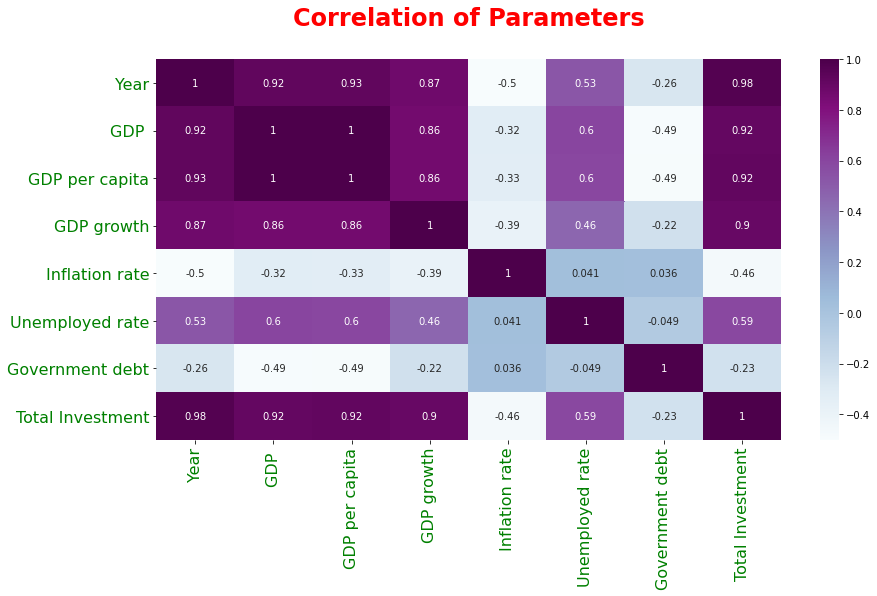

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
plt.xticks(fontsize=16,color='green')
plt.yticks(fontsize=16,color='green')
plt.title("Correlation of Parameters\n",fontsize=24,fontweight='bold',color='red')

<h2><u><center><font color="blue" size=10>Time Series Analysis of Data</center></u></h2>

In [19]:
df1 = df.set_index('Year')

Text(0.5, 1.0, 'GDP rise with years\n')

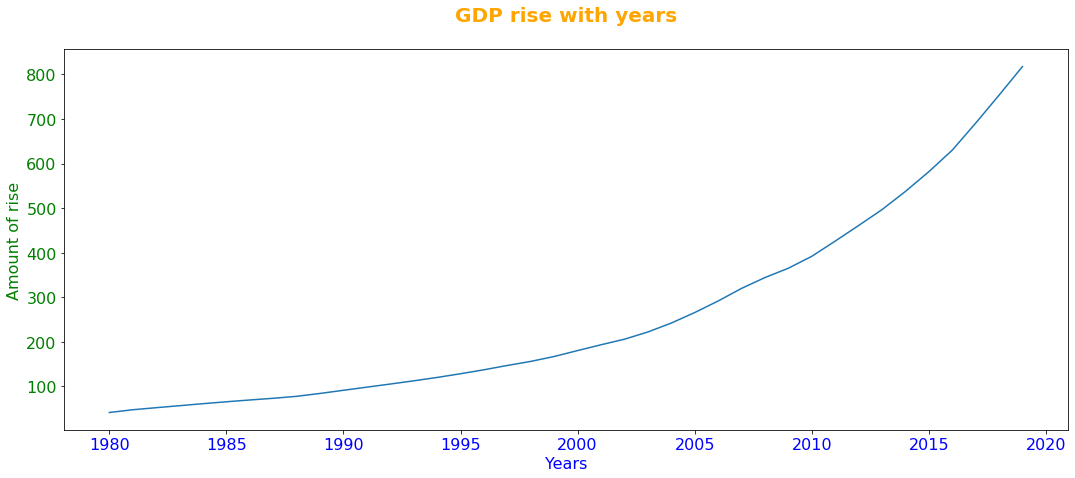

In [20]:
plt.figure(figsize=(18,7))
df1['GDP '].plot()
plt.xticks(fontsize=16,color='blue')
plt.xlabel('Years',fontsize=16,color='blue')
plt.ylabel('Amount of rise',fontsize=16,color='green')
plt.yticks(fontsize=16,color='green')
plt.title('GDP rise with years\n',fontsize=20,fontweight='bold',color='orange')

Text(0.5, 1.0, 'GDP per capita rise with years\n')

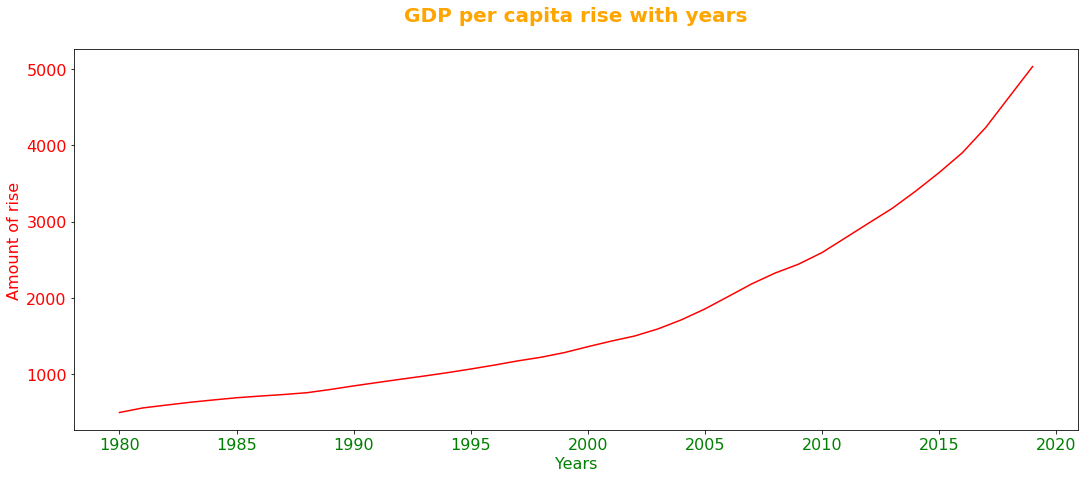

In [22]:
plt.figure(figsize=(18,7))
df1['GDP per capita'].plot(color='red')
plt.xticks(fontsize=16,color='green')
plt.xlabel('Years',fontsize=16,color='green')
plt.ylabel('Amount of rise',fontsize=16,color='red')
plt.yticks(fontsize=16,color='red')
plt.title('GDP per capita rise with years\n',fontsize=20,fontweight='bold',color='orange')

In [23]:
# importing pmdarima package

!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 17.9MB/s 
     |████████████████████████████████| 808kB 47.7MB/s 
     |████████████████████████████████| 2.1MB 45.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [24]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79980 sha256=97110f97aed51d27dfd5365a487484e93a3ee20020afc246ea65f3ab3bdda806
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [25]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [26]:
train = df[:30].values.reshape(-1,1)
valid = df[31:].values.reshape(-1,1)

In [27]:
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:437: ModelFitWarning:

Error fitting  ARIMA(1,0,1)(2,0,1)[6] intercept (if you do not want to see these

<Figure size 1296x504 with 0 Axes>

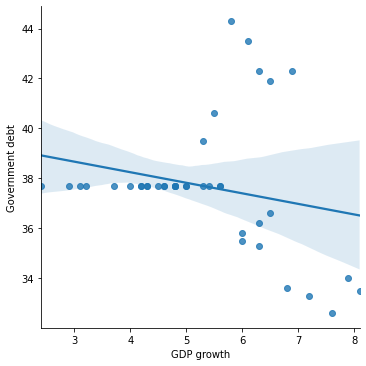

In [28]:
plt.figure(figsize=(18,7))
sns.lmplot(x='GDP growth',y='Government debt',data=df)

Text(0.5, 1.0, 'GDP growth vs Total Investment\n')

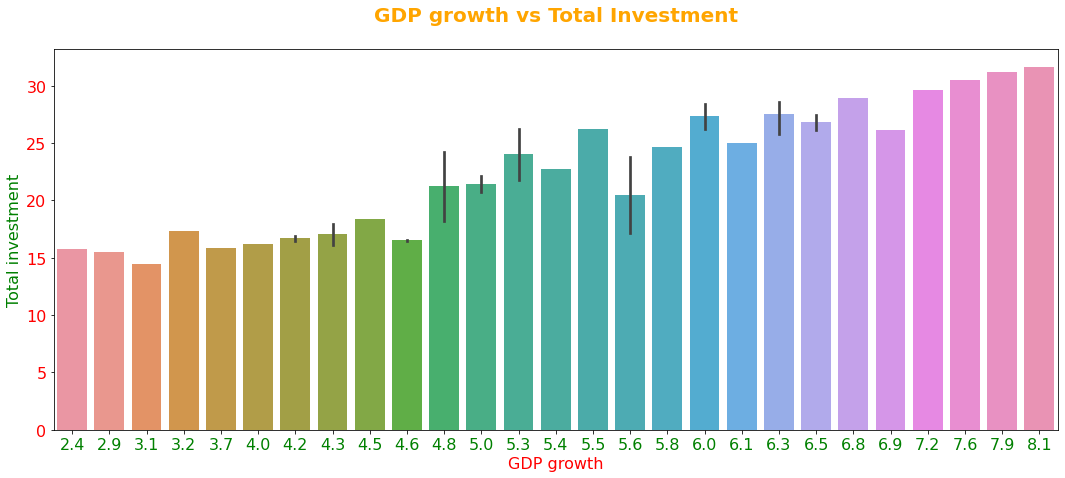

In [30]:
plt.figure(figsize=(18,7))
sns.barplot(x='GDP growth',y='Total Investment',data=df)
plt.xticks(fontsize=16,color='green')
plt.xlabel('GDP growth',fontsize=16,color='red')
plt.ylabel('Total investment',fontsize=16,color='green')
plt.yticks(fontsize=16,color='red')
plt.title('GDP growth vs Total Investment\n',fontsize=20,fontweight='bold',color='orange')

Text(0.5, 1.0, 'GDP effect on Inflation and Government debts\n')

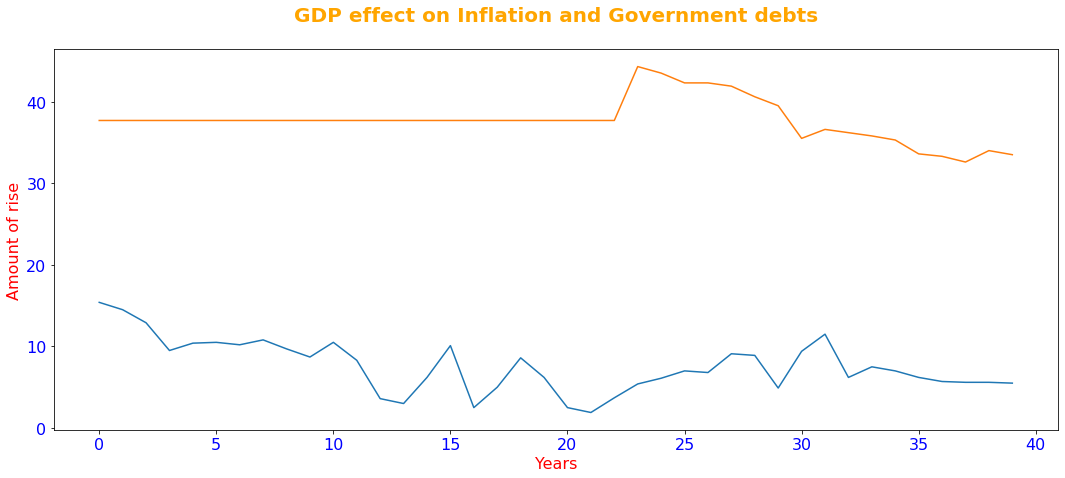

In [31]:
plt.figure(figsize=(18,7))
df['Inflation rate'].plot()
df['Government debt'].plot()
plt.xticks(fontsize=16,color='blue')
plt.xlabel('Years',fontsize=16,color='red')
plt.ylabel('Amount of rise',fontsize=16,color='red')
plt.yticks(fontsize=16,color='blue')
plt.title('GDP effect on Inflation and Government debts\n',fontsize=20,fontweight='bold',color='orange')

Text(0.5, 1.0, 'GDP growth vs Umemployed rate\n')

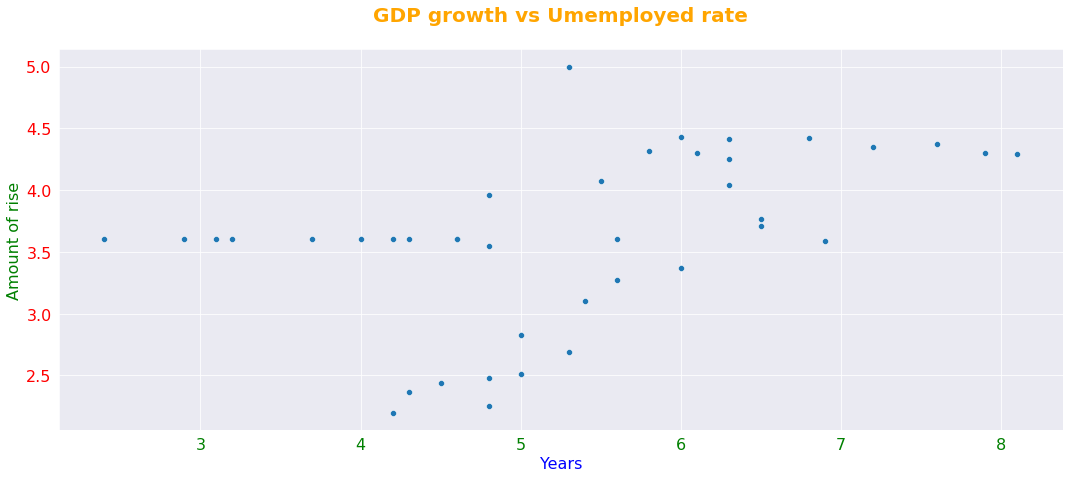

In [33]:
plt.figure(figsize=(18,7))
sns.set_style('darkgrid')
sns.scatterplot(x='GDP growth',y='Unemployed rate',data=df)
plt.xticks(fontsize=16,color='green')
plt.xlabel('Years',fontsize=16,color='blue')
plt.ylabel('Amount of rise',fontsize=16,color='green')
plt.yticks(fontsize=16,color='red')
plt.title('GDP growth vs Umemployed rate\n',fontsize=20,fontweight='bold',color='orange')